<a href="https://colab.research.google.com/github/Ercanuca/sislab/blob/main/Colaboratory'ye_Ho%C5%9F_Geldiniz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas


In [55]:
df = pandas.read_csv('https://raw.githubusercontent.com/irhallac/SisLab/main/hw_data/data_0123.csv', header=None)

In [56]:
df

,0,1,2,3,4,5,6,7
0,NaN,ozellik-1,ozellik-2,ozellik-3,ozellik-4,ozellik-5,ozellik-6,cikis
1,0.0,-7.43524376807876,-4.174863989374225,8.681144350265372,0.6689198460442981,-6.065572194257408,-2.1846252877118433,0
2,1.0,8.391228868187953,-9.339413646962674,-0.7081285456529649,1.7401474836179736,-3.4131668349248616,-7.336958698185232,1
3,2.0,-5.634695743414545,-3.565606355429833,9.664936352717044,2.732507047261708,-6.960467400518391,-0.8733563835962883,0
4,3.0,-6.330259003798252,-3.8256599344938773,9.589395582499485,0.9173987646197139,-6.954611368784061,-1.565933397485238,0
...,...,...,...,...,...,...,...,...
94,93.0,8.503909184457228,-9.336052548492042,-0.8757955902189782,1.8509760002631763,-4.714561400297591,-5.387236360241952,1
95,94.0,-7.164673617402079,-4.588733694935779,10.326705183017737,1.0559655081441597,-6.221009050070445,-3.4115196336723046,0
96,95.0,8.095333790965675,-9.62138198190637,0.9356796711657802,3.3340071814904526,-4.308568796330791,-7.683909011540598,1
97,96.0,-6.126117305793422,-3.855354201884977,10.318826739106612,2.963437093088043,-6.576239889779095,-2.5396168368122796,0


In [57]:
cikis = df.iloc[1:100, 7].values #1 ile 100 elemanı alarak 7 özelliği verdik. 
giris = df.iloc[1:100, [2,4, 6]].values # 2,4 ve 6. özellikleri giris olarak belirledik

giris = giris.astype(float) # gelen degerler string olduğu için float'a dönüştürdük.
cikis = cikis.astype(float)

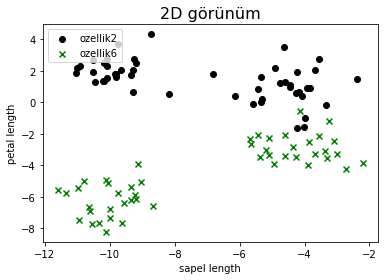

In [58]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:50, 0], giris[:50, 1], color='black', marker='o', label='ozellik2')
plt.scatter(giris[50:100, 0], giris[50:100, -1], color='green', marker='x', label='ozellik6')

plt.xlabel('sapel length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

plt.show()

In [59]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

        #ogrenme oranı ve iterasyon sayisini atadık

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        #ağırlık değerleri ve bias değerleri belirlenir
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, 0) # çıkış değerlerimiz 0-1 olduğundan dolayı

In [60]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=10) #siniflandiricimiza öğrenme oranı ve iterasyon sayısını verdik

In [61]:
siniflandirici.ogren(giris, cikis)

In [62]:
siniflandirici.w

array([-3.7       , -0.30243229, -0.13469308, -0.33269782])

In [63]:
siniflandirici.hatalar # 7. iterasyondan sonra hata değerimiz 0'a indi. Makine 7. iterasyondan sonra öğrenmeye başladı

[42, 6, 32, 7, 3, 6, 3, 0, 0, 0]

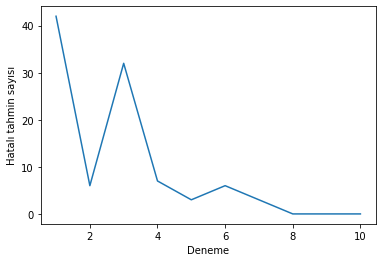

In [64]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()